# **K-Means Clustering with US Charities**
### **Data obtained from charitynavigator.org**

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('charity_navigator_clean.csv', index_col = 0)

Create a dataframe with no null values.

In [4]:
df = df[df['comp_leader_income'].isnull() == False].reset_index(drop = True)

In [5]:
df.head()

,accountability_score,administrative_expenses,charity_name,charity_url,city,cn_advisory,comp_leader_income,comp_leader_expense_pct,comp_leader_title,excess_or_deficit_for_year,...,net_assets,other_revenue,overall_score,payments_to_affiliates,program_expenses,state,total_contributions,org_type,org_category,org_type_id
0,89.0,164590.0,9to5 National Association of Working Women,https://www.charitynavigator.org/index.cfm?bay...,Milwaukee,NaN,53463.0,3.11,Executive Director,349718.0,...,1350382,49634.0,89.75,0,1440463,WI,1999023,Human and Civil Rights,Advocacy and Education,0.0
1,86.0,1001560.0,'Aha Pūnana Leo,https://www.charitynavigator.org/index.cfm?bay...,Hilo,NaN,73500.0,1.47,Executive Director,1175965.0,...,14773920,382540.0,85.95,0,3912270,HI,3339358,Education,Early Childhood Programs and Services,1.0
2,85.0,93957.0,AID FOR AIDS International,https://www.charitynavigator.org/index.cfm?bay...,New York,NaN,85000.0,0.99,Executive Director,-461502.0,...,-770370,0.0,80.96,0,8157850,NY,8039138,International,Development and Relief Services,2.0
3,86.0,346867.0,Futures in Education,https://www.charitynavigator.org/index.cfm?bay...,Brooklyn,NaN,61220.0,0.78,Acting Executive Director,1872733.0,...,11460087,-81726.0,89.94,0,7018262,NY,9704138,Education,Scholarship and Financial Support,1.0
4,97.0,135195.0,Every Generation Ministries,https://www.charitynavigator.org/index.cfm?bay...,Temecula,NaN,74244.0,5.41,President,-103940.0,...,723772,32436.0,90.62,0,1148407,CA,1234662,Religion,Religious Activities,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 22 columns):
accountability_score          7290 non-null float64
administrative_expenses       7290 non-null float64
charity_name                  7288 non-null object
charity_url                   7290 non-null object
city                          7289 non-null object
cn_advisory                   4 non-null object
comp_leader_income            7290 non-null float64
comp_leader_expense_pct       7290 non-null float64
comp_leader_title             7290 non-null object
excess_or_deficit_for_year    7290 non-null float64
financial_score               7290 non-null float64
fundraising_expenses          7290 non-null int64
net_assets                    7290 non-null int64
other_revenue                 7290 non-null float64
overall_score                 7290 non-null float64
payments_to_affiliates        7290 non-null int64
program_expenses              7290 non-null int64
state                    

In [7]:
df.describe()

,accountability_score,administrative_expenses,comp_leader_income,comp_leader_expense_pct,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,payments_to_affiliates,program_expenses,total_contributions,org_type_id
count,7290.000000,7.290000e+03,7.290000e+03,7290.000000,7.290000e+03,7290.000000,7.290000e+03,7.290000e+03,7.290000e+03,7290.000000,7.290000e+03,7.290000e+03,7.290000e+03,7290.000000
mean,91.338683,1.294414e+06,1.659498e+05,3.543462,9.060532e+05,85.966429,1.070673e+06,3.219307e+07,1.190769e+06,87.178483,1.977978e+04,1.345123e+07,1.286215e+07,5.705898
std,8.873393,6.049582e+06,1.298927e+05,2.384256,1.180910e+07,9.940291,6.142220e+06,1.752289e+08,7.803896e+06,7.777421,2.624573e+05,6.457635e+07,6.028956e+07,2.727216
min,24.000000,9.440000e+02,1.000000e+00,0.000000,-2.691435e+08,0.000000,1.301000e+03,-1.290334e+07,-1.391081e+07,18.950000,-4.101700e+04,7.718300e+04,9.063000e+04,0.000000
25%,89.000000,1.945552e+05,9.155775e+04,1.610000,-2.368478e+05,81.180000,1.605952e+05,2.088086e+06,1.116200e+04,83.730000,0.000000e+00,1.683411e+06,1.701188e+06,4.000000
50%,93.000000,3.732055e+05,1.311865e+05,3.150000,6.882200e+04,87.500000,3.264685e+05,5.658102e+06,1.145770e+05,88.530000,0.000000e+00,3.211320e+06,3.273303e+06,7.000000
75%,97.000000,8.588372e+05,1.977418e+05,5.120000,6.325405e+05,92.500000,7.113882e+05,1.631770e+07,4.977250e+05,92.020000,0.000000e+00,7.953149e+06,7.657308e+06,8.000000
max,100.000000,2.569202e+08,2.013535e+06,9.990000,4.531299e+08,100.000000,3.377669e+08,7.551342e+09,3.903250e+08,100.000000,1.679144e+07,2.499301e+09,2.379130e+09,10.000000


Add dummy variables for organization type.

In [8]:
org_type_dummies = pd.get_dummies(df.org_type)
df = pd.concat([df, org_type_dummies], axis = 1, join = 'outer')

## **Predicting positive or negative 2017 profit for US charities**

In [9]:
n = 0
for excess_or_deficit in df['excess_or_deficit_for_year']:
    if df.loc[n, 'excess_or_deficit_for_year'] > 0:
        df.loc[n, 'excess_or_deficit_id'] = str(1)
        n += 1
    elif df.loc[n, 'excess_or_deficit_for_year'] <= 0:
        df.loc[n, 'excess_or_deficit_id'] = str(0)
        n += 1

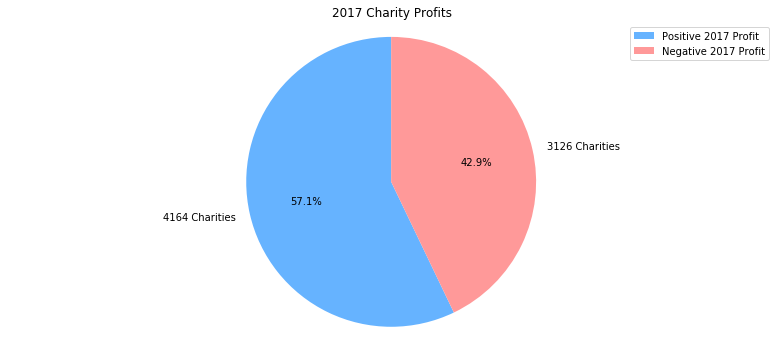

In [10]:
plt.figure(figsize = (11, 5))
labels = [str(df['excess_or_deficit_id'].value_counts()[0]) + ' Charities', 
          str(df['excess_or_deficit_id'].value_counts()[1]) + ' Charities']
plt.pie(df['excess_or_deficit_id'].value_counts(), 
        labels = labels, 
        colors = ['#66b3ff', '#ff9999'],
        autopct = '%1.1f%%', startangle = 90)
plt.title('2017 Charity Profits')
plt.legend(['Positive 2017 Profit', 'Negative 2017 Profit'], loc = 'best')
plt.axis('equal')
plt.tight_layout()

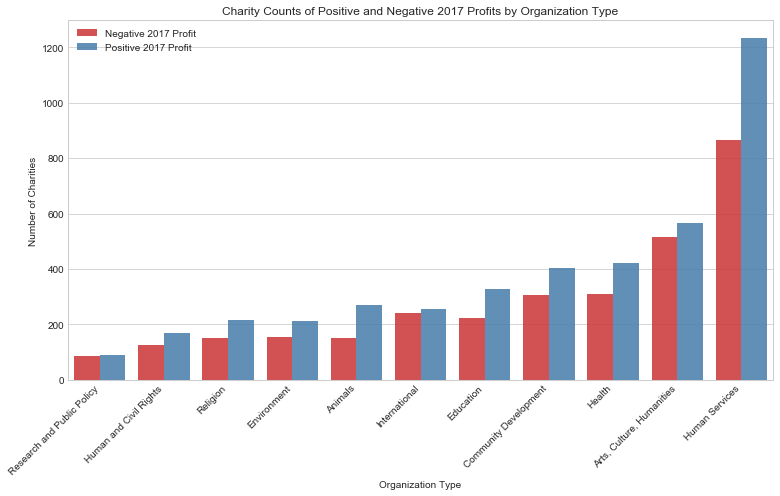

In [11]:
plt.figure(figsize = (11, 7))

ax = sns.countplot(x = 'org_type_id', hue = 'excess_or_deficit_id',
                   data = df, palette = 'Set1', alpha = 0.85,
                   order = reversed(df['org_type_id'].value_counts().index))
ax.set_xlabel('Organization Type')
ax.set_ylabel('Number of Charities')
ax.set_title('Charity Counts of Positive and Negative 2017 Profits by Organization Type')
ax.set_xticklabels(reversed(df['org_type'].value_counts().index),
                   rotation = 45, ha = "right")
plt.legend(['Negative 2017 Profit', 'Positive 2017 Profit'])
plt.tight_layout()

Drop non-numerical variables from the dataframe.

In [12]:
df.drop(['charity_name', 'charity_url',
         'city', 'cn_advisory',
         'state', 'org_category',
         'comp_leader_title'], 
         axis = 1, inplace = True)
df.head()

,accountability_score,administrative_expenses,comp_leader_income,comp_leader_expense_pct,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,...,Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy,excess_or_deficit_id
0,89.0,164590.0,53463.0,3.11,349718.0,90.56,111522,1350382,49634.0,89.75,...,0,0,0,0,0,1,0,0,0,1
1,86.0,1001560.0,73500.0,1.47,1175965.0,85.92,54613,14773920,382540.0,85.95,...,0,1,0,0,0,0,0,0,0,1
2,85.0,93957.0,85000.0,0.99,-461502.0,77.65,248833,-770370,0.0,80.96,...,0,0,0,0,0,0,1,0,0,0
3,86.0,346867.0,61220.0,0.78,1872733.0,97.50,384550,11460087,-81726.0,89.94,...,0,1,0,0,0,0,0,0,0,1
4,97.0,135195.0,74244.0,5.41,-103940.0,87.08,87436,723772,32436.0,90.62,...,0,0,0,0,0,0,0,1,0,0


### **Standard Scaler**

First use a standard scaler to level all features in the model.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['excess_or_deficit_for_year', 'excess_or_deficit_id',
                                         'org_type_id', 'org_type'], axis = 1))

Create a dataframe to see scaled features.

In [15]:
df_scaled = pd.DataFrame(X_scaled, columns = df.drop(['excess_or_deficit_for_year',
                                                      'excess_or_deficit_id',
                                                      'org_type_id', 'org_type'],
                                                     axis = 1).columns)
df_scaled.head()

,accountability_score,administrative_expenses,comp_leader_income,comp_leader_expense_pct,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,payments_to_affiliates,...,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,-0.263579,-0.186773,-0.866057,-0.181814,0.462148,-0.156168,-0.176026,-0.146236,0.330661,-0.075369,...,-0.417255,-0.327716,-0.285942,-0.230243,-0.334349,-0.635888,4.886773,-0.270780,-0.229912,-0.157289
1,-0.601692,-0.048412,-0.711788,-0.869707,-0.004671,-0.165434,-0.099415,-0.103574,-0.157966,-0.075369,...,-0.417255,-0.327716,3.497212,-0.230243,-0.334349,-0.635888,-0.204634,-0.270780,-0.229912,-0.157289
2,-0.714396,-0.198450,-0.623248,-1.071041,-0.836696,-0.133811,-0.188129,-0.152597,-0.799611,-0.075369,...,-0.417255,-0.327716,-0.285942,-0.230243,-0.334349,-0.635888,-0.204634,3.693041,-0.229912,-0.157289
3,-0.601692,-0.156641,-0.806334,-1.159125,1.160365,-0.111714,-0.118328,-0.163070,0.355093,-0.075369,...,-0.417255,-0.327716,3.497212,-0.230243,-0.334349,-0.635888,-0.204634,-0.270780,-0.229912,-0.157289
4,0.638054,-0.191633,-0.706060,0.782913,0.112034,-0.160089,-0.179602,-0.148440,0.442531,-0.075369,...,-0.417255,-0.327716,-0.285942,-0.230243,-0.334349,-0.635888,-0.204634,-0.270780,4.349486,-0.157289


### **K-Means Clusreing**

#### *Will k-means clustering allow for an accurate model to predict whether a charity's 2017 profit was positive or negative?*

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics

Instantiate KMeans() and fit our data to a new model with the number of classifications as the number of clusters.

In [17]:
kmeans = KMeans(2)
kmeans.fit(X_scaled)
y_kmeans = kmeans.fit_predict(X_scaled)

In [18]:
centers = kmeans.cluster_centers_

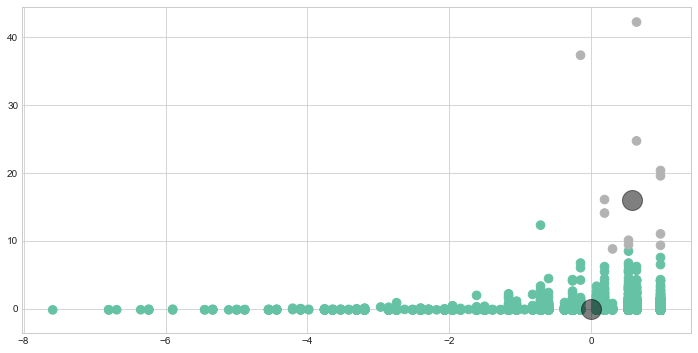

In [19]:
plt.figure(figsize = (12, 6))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = y_kmeans, s = 75, cmap = 'Set2')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 400, alpha = 0.5);

In [20]:
print(metrics.classification_report(df['excess_or_deficit_id'].astype(int), kmeans.labels_))
print(metrics.confusion_matrix(df['excess_or_deficit_id'].astype(int), kmeans.labels_))

             precision    recall  f1-score   support

          0       0.43      1.00      0.60      3126
          1       0.71      0.00      0.00      4164

avg / total       0.59      0.43      0.26      7290

[[3122    4]
 [4154   10]]


## **Predicting organization type for US charities**

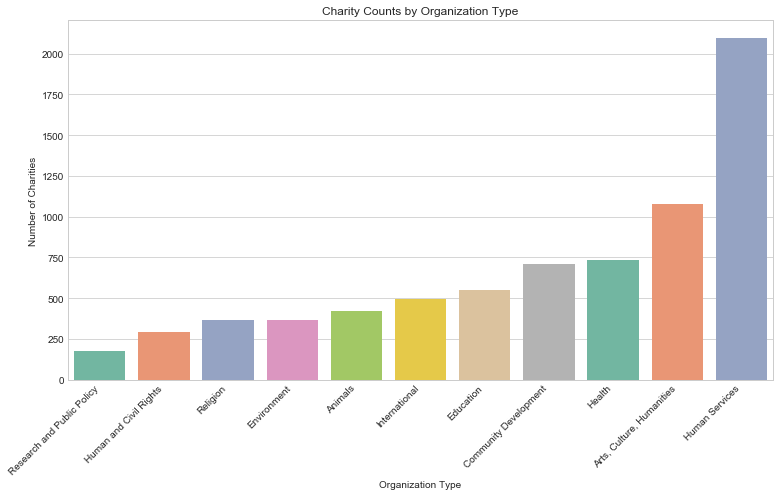

In [21]:
sns.set_style("white")
plt.figure(figsize = (11, 7))

ax = sns.countplot(x = 'org_type_id',
                   data = df, palette = 'Set2',
                   order = reversed(df['org_type_id'].value_counts().index))
ax.set_title('Charity Counts by Organization Type')
ax.set_xlabel('Organization Type')
ax.set_ylabel('Number of Charities')
ax.set_xticklabels(reversed(df['org_type'].value_counts().index),
                   rotation = 45, ha = "right")

plt.tight_layout()

### **Standard Scaler**

First use a standard scaler to level all features in the model.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['excess_or_deficit_id', 'org_type_id',
                                         'org_type', 'Animals', 'Arts, Culture, Humanities',
                                         'Community Development', 'Education',
                                         'Environment', 'Health', 'Human Services',
                                         'Human and Civil Rights', 'International',
                                         'Religion', 'Research and Public Policy'], axis = 1))

Create a dataframe to see scaled features.

In [24]:
df_scaled = pd.DataFrame(X_scaled, columns = df.drop(['excess_or_deficit_id', 'org_type_id',
                                                      'org_type', 'Animals', 'Arts, Culture, Humanities',
                                                      'Community Development', 'Education',
                                                      'Environment', 'Health', 'Human Services',
                                                      'Human and Civil Rights', 'International',
                                                      'Religion', 'Research and Public Policy'], axis = 1).columns)
df_scaled.head()

,accountability_score,administrative_expenses,comp_leader_income,comp_leader_expense_pct,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,payments_to_affiliates,program_expenses,total_contributions
0,-0.263579,-0.186773,-0.866057,-0.181814,-0.047114,0.462148,-0.156168,-0.176026,-0.146236,0.330661,-0.075369,-0.186006,-0.180195
1,-0.601692,-0.048412,-0.711788,-0.869707,0.022858,-0.004671,-0.165434,-0.099415,-0.103574,-0.157966,-0.075369,-0.147726,-0.157962
2,-0.714396,-0.198450,-0.623248,-1.071041,-0.115813,-0.836696,-0.133811,-0.188129,-0.152597,-0.799611,-0.075369,-0.081977,-0.080003
3,-0.601692,-0.156641,-0.806334,-1.159125,0.081865,1.160365,-0.111714,-0.118328,-0.163070,0.355093,-0.075369,-0.099625,-0.052384
4,0.638054,-0.191633,-0.706060,0.782913,-0.085533,0.112034,-0.160089,-0.179602,-0.148440,0.442531,-0.075369,-0.190529,-0.192874


### **K-Means Clusreing**

#### *Will k-means clustering allow for an accurate model to predict a charity's organization type?*

In [25]:
from sklearn.cluster import KMeans
from sklearn import metrics

Instantiate KMeans() and fit our data to a new model with the number of organization types as the number of clusters.

In [26]:
kmeans = KMeans(11)
kmeans.fit(X_scaled)
y_kmeans = kmeans.fit_predict(X_scaled)

In [27]:
centers = kmeans.cluster_centers_

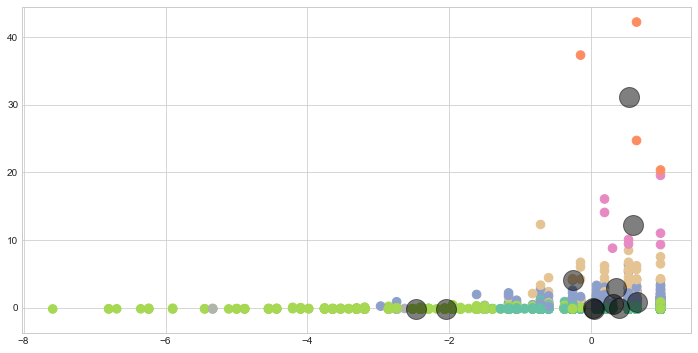

In [28]:
plt.figure(figsize = (12, 6))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = y_kmeans, s = 75, cmap = 'Set2')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 400, alpha = 0.5);

             precision    recall  f1-score   support

        0.0       0.04      0.19      0.07       293
        1.0       0.11      0.32      0.16       551
        2.0       0.00      0.00      0.00       498
        3.0       0.02      0.03      0.02       366
        4.0       0.00      0.00      0.00       707
        5.0       0.03      0.05      0.04       367
        6.0       0.07      0.29      0.12       733
        7.0       0.00      0.00      0.00      1081
        8.0       0.05      0.00      0.00      2099
        9.0       0.00      0.00      0.00       419
       10.0       0.00      0.00      0.00       176

avg / total       0.03      0.07      0.03      7290



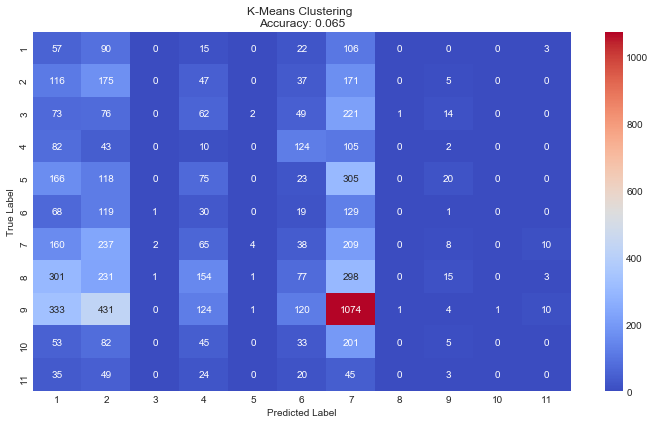

In [29]:
print(metrics.classification_report(df['org_type_id'], kmeans.labels_))

df_cm = pd.DataFrame(metrics.confusion_matrix(df['org_type_id'], kmeans.labels_), 
                     index = [i for i in range(1, 12)],
                     columns = [i for i in range(1, 12)])

plt.figure(figsize = (10, 6))
sns.heatmap(df_cm, annot = True, fmt = 'g', cmap = 'coolwarm')
plt.title('K-Means Clustering \nAccuracy: {0:.3f}' \
          .format(metrics.accuracy_score(df['org_type_id'], kmeans.labels_)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label');
plt.tight_layout()